In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes, box_boundaries
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider
from heatmap import HeatMap 

import warnings
warnings.filterwarnings('ignore')

In [12]:
svc = joblib.load('svc2.pkl')
scaler = joblib.load('scaler2.pkl')

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 11,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

cls = BinaryClassifier(svc, scaler)
src = FeatureSourcer(sourcer_params)
slider = Slider(sourcer = src, classifier = cls, increment = 8)

frame1 = imread("datasets/full/other/Butterfly/original.jpeg?1532741436.jpg")
frame2 = imread("datasets/full/other/Bee/bbabfdf4-3be0-4210-bd01-8c6f3b16d002_image.jpg")
frame3 = imread("datasets/full/other/Mosquito/248aad4e-e34c-4996-ab46-b28c873232e1.jpg")
frame4 = imread("datasets/full/other/Fly/8820c3a0-e1a5-4dd4-a4d7-3b2855f91875_image.jpg")
frame5 = imread("datasets/full/other/Fly/58418.jpg")
frame6 = imread("datasets/full/other/Mosquito/385f2d78-7de5-4cbc-8226-c09a9ca9aa1f.jpg")

window_sizes = 64, 80, 120, 150
window_positions = 360, 410, 390, 380

heatmap = HeatMap(frame = frame1, thresh = 6, memory = 4)

In [16]:
def generate_wp(frame, nb_div):
    wp = []
    height = frame.shape[0]
    for i in range(nb_div):
        wp.append(height//nb_div * i)
    return wp

def generate_ws(frame, nb_div):
    total_size = min(frame.shape[0], frame.shape[1])
    ws = []
    for i in range(1, nb_div + 1):
        ws.append(total_size//nb_div * i)
    return ws

In [17]:
def heatmap_test(this_frame, this_heatmap, nb_div):
    this_heatmap.reset()
    
    window_position = []
    window_size = []

    for pos in generate_wp(this_frame, nb_div):
        for size in generate_ws(this_frame, nb_div):
            window_position.append(pos)
            window_size.append(size)

    for sz, pos in zip(window_size, window_position):
        bounding_boxes = slider.locate(frame = this_frame, window_size = sz, window_position = pos)
        this_heatmap.update(bounding_boxes)

    this_heatmap.show(this_frame)

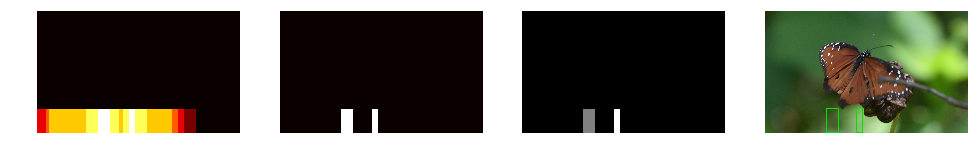

In [23]:
heatmap_test(frame1, heatmap, 5)

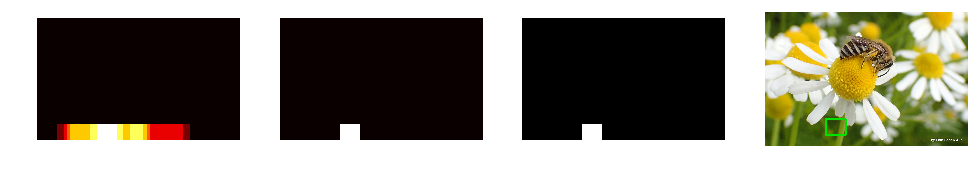

In [24]:
heatmap_test(frame2, heatmap, 5)

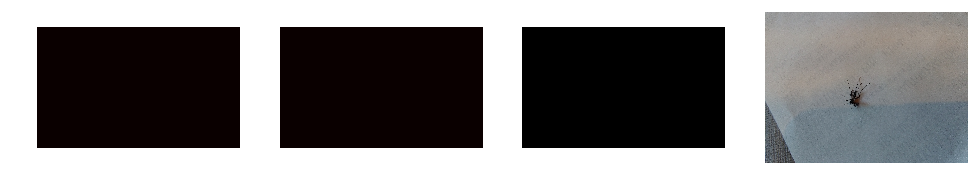

In [25]:
heatmap_test(frame3, heatmap, 5)

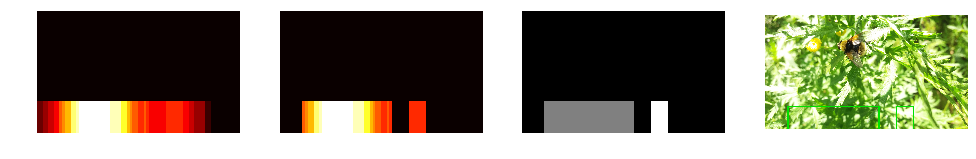

In [26]:
heatmap_test(frame4, heatmap, 5)

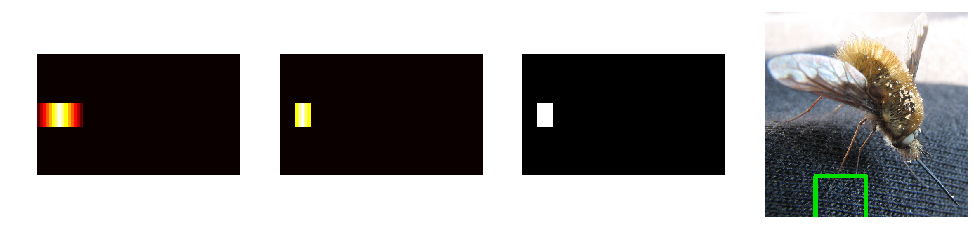

In [27]:
heatmap_test(frame5, heatmap, 5)

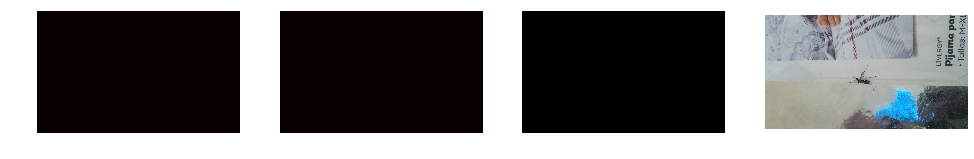

In [28]:
heatmap_test(frame6, heatmap, 5)

In [29]:
ws = 80, 120, 160, 180, 240
wp = 410, 390, 380, 380, 370
this_frame = imread("test6.jpg")
heatmap.reset()

for sz, pos in zip(ws, wp):
    bounding_boxes = slider.locate(frame = this_frame, window_size = sz, window_position = pos)
    heatmap.update(bounding_boxes)

mp, tmp, lmp = heatmap.get()
labeled_img = heatmap.draw(this_frame)

FileNotFoundError: [Errno 2] No such file or directory: 'test6.jpg'

In [11]:
def hot_to_rgb(data):
    data_ = (data - np.min(data)) / (np.max(data) - np.min(data))
    my_cmap = plt.cm.get_cmap('hot')
    color_array = my_cmap(data_)
    return color_array

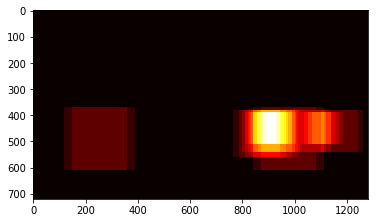

In [12]:
img = hot_to_rgb(mp)
plt.imshow(np.dstack((img[:, :, 0], img[:, :, 1], img[:, :, 2])))

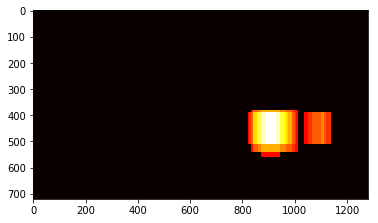

In [13]:
plt.imshow(hot_to_rgb(tmp))

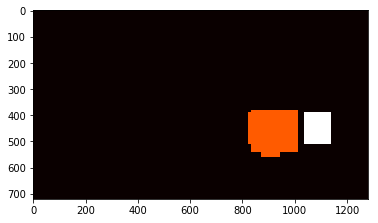

In [14]:
plt.imshow(hot_to_rgb(lmp))